<a href="https://colab.research.google.com/github/mkatto/CS4641_Group3/blob/master/PCAcode_MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA

Importing Data Field

In [ ]:
import pandas as pd
import numpy as np
#################
yyear = 2008
#################

df1 = pd.read_csv("freedom.csv")
# https://www.heritage.org/index/explore?view=by-region-country-year&u=637302137906965144

unemployment = pd.read_csv("unemployment.csv").set_index('Country Name')[str(yyear)]
# https://data.worldbank.org/indicator/FR.INR.RINR
print(df1)
df1 = pd.merge(df1, unemployment, right_on = 'Country Name', left_on= 'Name')
for name in df1.keys():
    df1 = df1.rename(columns= {name: name.replace(" ", "")})
df1 = df1.rename(columns= {str(yyear): "unemployment"})
df1 = df1.dropna()
# print(df1)
# print(df1.shape)
unemployment = df1.iloc[:,-1]
print(unemployment)
print(np.median(unemployment))
print(np.mean(unemployment))
# print(df1)
# print(df1.shape)

           Name  Index Year  ...  Investment Freedom  Financial Freedom
0       Albania        2007  ...                  60                 70
1       Algeria        2007  ...                  50                 20
2        Angola        2007  ...                  20                 40
3     Argentina        2007  ...                  50                 40
4       Armenia        2007  ...                  60                 70
..          ...         ...  ...                 ...                ...
152  Venezuela         2007  ...                  20                 40
153     Vietnam        2007  ...                  30                 30
154       Yemen        2007  ...                  50                 30
155      Zambia        2007  ...                  50                 50
156    Zimbabwe        2007  ...                  10                 20

[157 rows x 13 columns]
0      13.059900
1      11.330000
3       7.837400
4      22.973801
5       4.234200
         ...    
116     6

PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


Standardize the Data


In [ ]:
features = ['OverallScore', 'PropertyRights', 'GovernmentIntegrity', 'TaxBurden','GovernmentSpending', 'BusinessFreedom', 'LaborFreedom', 'MonetaryFreedom','TradeFreedom', 'InvestmentFreedom', 'FinancialFreedom']
# Separating out the features
x = df1.loc[:, features].values
# print(x)

# Separating out the target
y = df1.loc[:,['unemployment']].values

medianUnemployment = np.median(y)
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x.shape)
# print(x[:,-1])

[[13.05990028]
 [11.32999992]
 [ 7.83739996]
 [22.97380066]
 [ 4.2342    ]
 [ 4.12809992]
 [ 5.86000013]
 [ 3.70000005]
 [ 8.11999989]
 [ 0.80000001]
 [ 6.97559977]
 [ 8.18000031]
 [ 2.60339999]
 [23.40530014]
 [ 7.34259987]
 [ 5.60949993]
 [ 1.63357449]
 [ 0.82450002]
 [ 6.13710022]
 [ 9.28499985]
 [ 4.19999981]
 [11.27299976]
 [ 8.53030014]
 [ 1.58299995]
 [ 3.65470004]
 [ 4.39249992]
 [ 3.43370008]
 [ 4.76429987]
 [ 3.91689992]
 [ 5.45489979]
 [ 8.93999958]
 [ 6.36859989]
 [ 7.06339979]
 [17.87000084]
 [ 7.52449989]
 [ 7.75969982]
 [ 2.94560003]
 [ 7.20849991]
 [ 6.7736001 ]
 [ 7.704     ]
 [ 6.72319984]
 [ 4.        ]
 [12.69999981]
 [ 6.63000011]
 [ 1.75      ]
 [ 7.73890019]
 [35.45999908]
 [ 5.82590008]
 [ 5.06010008]
 [ 5.97660017]
 [ 7.16970015]
 [ 3.87409997]
 [ 3.98000002]
 [ 5.56479979]
 [ 9.56999969]
 [ 1.32790005]
 [ 3.65420008]
 [ 4.16699982]
 [33.76129913]
 [ 2.54990006]
 [ 4.14177656]
 [ 4.05670023]
 [ 3.71989989]
 [ 7.11759996]
 [ 7.55170012]
 [ 0.31      ]
 [ 5.78749

Two Component PCA

In [ ]:
pca2 = PCA(n_components=2)
pca2.fit(x)
# PCA(n_components=2)
print(pca2.explained_variance_ratio_)
print(pca2.singular_values_)

[0.56266721 0.15515701]
[22.66528534 11.90203146]


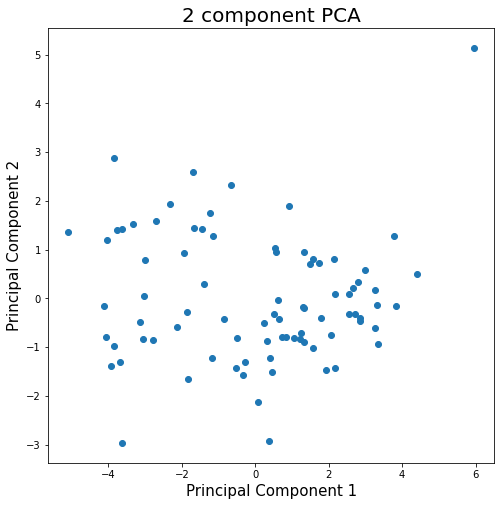

In [ ]:
#plot 
pca = PCA(n_components=2)
x_r = pca.fit(x).transform(x)
# print(x_r)
# print(x_r[:,1])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.scatter(x_r[:,0],x_r[:,1])


Median Unemployment Rate:  5.83 %


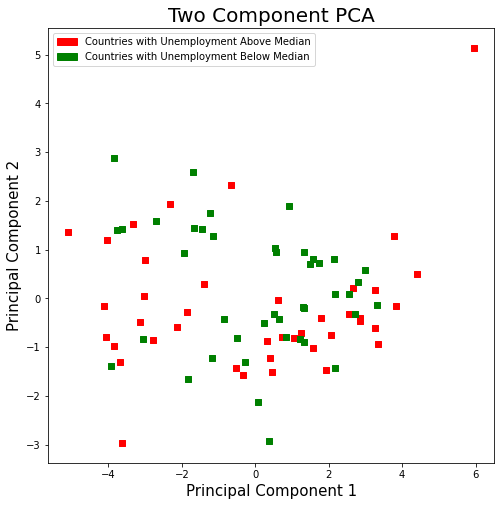

In [84]:
import matplotlib.patches as mpatches
#plot 
pca = PCA(n_components=2)
x_r = pca.fit(x).transform(x)
medianUnemployment = np.median(y)
print("Median Unemployment Rate: ", round(medianUnemployment,2),"%")
# print(x_r)
# print(x_r[:,1])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two Component PCA', fontsize = 20)
# print(len(y<medianUnemployment))
lowUnemployment = (y<medianUnemployment)[:,0]

pc1 = x_r[:,0]
pc2 = x_r[:,1]


# print(pc1[y<medianUnemployment])
ax.scatter(pc1[lowUnemployment], pc2[lowUnemployment], marker="s", color="r")
ax.scatter(pc1[np.logical_not(lowUnemployment)], pc2[np.logical_not(lowUnemployment)], marker="s", color="g")
red_patch = mpatches.Patch(color='red', label='Countries with Unemployment Above Median')
green_patch = mpatches.Patch(color='green', label='Countries with Unemployment Below Median')
plt.legend(handles=[red_patch,green_patch])
# ax.scatter(x_r[np.abs(y)>medianUnemployment], x_r[np.abs(y)>medianUnemployment], marker="s", color="#2e91be")
# plt.scatter(x_r[country,0],x_r[country,1],color)


Three component PCA

In [ ]:
pca3 = PCA(n_components=3)
pca3.fit(x)
print(pca3.explained_variance_ratio_)
print(pca3.singular_values_)

[0.56266721 0.15515701 0.07564775]
[22.66528534 11.90203146  8.3106197 ]


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


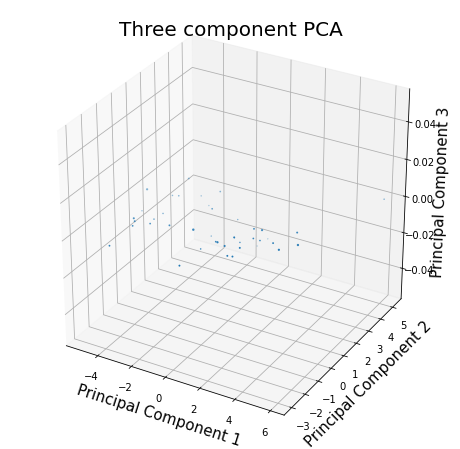

In [ ]:
#plot 
pca3 = PCA(n_components=3)
x3 = pca3.fit(x).transform(x)
# print(x3)
# print(x_r[:,1])

fig3 = plt.figure(figsize = (8,8))
ax3 = fig3.add_subplot(1,1,1, projection='3d')
ax3.set_xlabel('Principal Component 1', fontsize = 15)
ax3.set_ylabel('Principal Component 2', fontsize = 15)
ax3.set_zlabel('Principal Component 3', fontsize = 15)
ax3.set_title('Three component PCA', fontsize = 20)
plt.scatter(x3[:,0],x3[:,1],x3[:,2])

In [ ]:
print(unemployment.shape)
print(x.shape)

(83,)
(83, 11)


In [ ]:
from scipy import linalg
U, s, Vh = linalg.svd(x)
# print(U)
print(s)
print(Vh[0])



[2.26652853e+01 1.19020315e+01 8.31061970e+00 6.82916041e+00
 6.33080090e+00 5.89273130e+00 5.09968190e+00 4.40281080e+00
 3.93000132e+00 2.50648742e+00 2.11132831e-02]
[ 0.36840477  0.36534278  0.36202233 -0.18445361 -0.18464042  0.33842926
  0.17085168  0.2878483   0.29613507  0.34511074  0.31344615]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


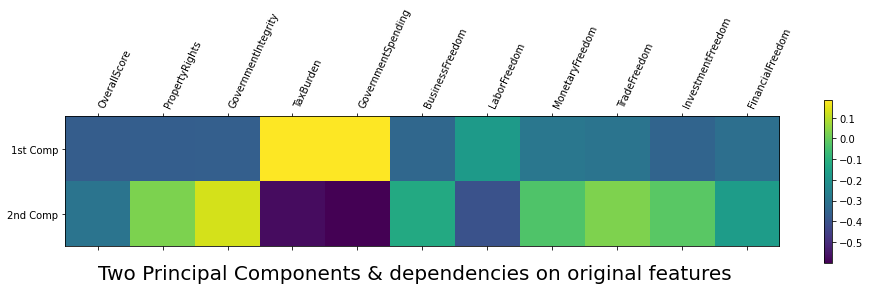

In [ ]:
plt.matshow(pca2.components_,cmap='viridis')
plt.text(s = 'Two Principal Components & dependencies on original features', x = 0, y = 2, fontsize = 20, )
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


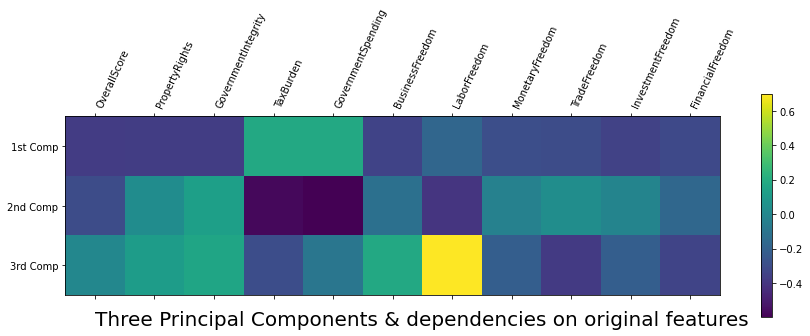

In [ ]:
plt.matshow(pca3.components_,cmap='viridis')
plt.text(s = 'Three Principal Components & dependencies on original features', x = 0, y = 3, fontsize = 20, )
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 